**Final Capstone Project by Kate Jorjoliani**

**Data Extraction**

In [1]:
import requests
import json
import pandas as pd

# Define your Yelp API key
API_KEY = 'Mguw9Zi69xOkEzhD-wdZzfsk5wp0H8fbdDjcoNPE7_lNu8tG27HHpTuXDpRBcg996vH2K5olbx1ljKPCJ-sHqMpG0etkwqwa_Vm1pKI1aufVNOUaPsrRW33VpNbnZXYx'

# Define the search parameters
location = 'New York, NY'
term = 'coffee shop'
limit = 50  # Number of results to fetch

# Yelp API endpoint
url = 'https://api.yelp.com/v3/businesses/search'

# Define headers with API key
headers = {
    'Authorization': f'Bearer {API_KEY}',
}

# Define query parameters
params = {
    'term': term,
    'location': location,
    'limit': limit,
}

# Make GET request to Yelp API
response = requests.get(url, headers=headers, params=params)

# Check if request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Extract relevant information from the response
    businesses = data['businesses']

    # Initialize lists to store data
    names = []
    ratings = []
    review_counts = []
    addresses = []

    # Loop through each business and extract relevant data
    for business in businesses:
        names.append(business['name'])
        ratings.append(business['rating'])
        review_counts.append(business['review_count'])
        addresses.append(', '.join(business['location']['display_address']))

    # Create a DataFrame to store the data
    df = pd.DataFrame({
        'Name': names,
        'Rating': ratings,
        'Review Count': review_counts,
        'Address': addresses
    })

    # Display the DataFrame
    print(df)

    # Save DataFrame to CSV
    df.to_csv('coffee_shops_data.csv', index=False)

else:
    print('Error occurred while fetching data from Yelp API')

# Define the search parameters
location = 'New York, NY'  # Example location
term = 'coffee shop'
limit = 50  # Number of results to fetch

# Yelp API endpoint
url = 'https://api.yelp.com/v3/businesses/search'

# Define headers with API key
headers = {
    'Authorization': f'Bearer {API_KEY}',
}

# Define query parameters
params = {
    'term': term,
    'location': location,
    'limit': limit,
}

# Make GET request to Yelp API
response = requests.get(url, headers=headers, params=params)

# Check if request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Extract relevant information from the response
    businesses = data['businesses']

    # Initialize lists to store data
    names = []
    ratings = []
    review_counts = []
    addresses = []

    # Loop through each business and extract relevant data
    for business in businesses:
        names.append(business['name'])
        ratings.append(business['rating'])
        review_counts.append(business['review_count'])
        addresses.append(', '.join(business['location']['display_address']))

    # Create a DataFrame to store the data
    df = pd.DataFrame({
        'Name': names,
        'Rating': ratings,
        'Review Count': review_counts,
        'Address': addresses
    })

    # Display the DataFrame
    print(df)

    # Save DataFrame to CSV
    df.to_csv('coffee_shops_data.csv', index=False)

else:
    print('Error occurred while fetching data from Yelp API')


                                      Name  Rating  Review Count  \
0                    Dreamers Coffee House     4.6            77   
1                         Dawn’s ‘Til Dusk     4.3            28   
2                                % Arabica     4.4           271   
3                            Not As Bitter     4.3            15   
4                                    Creme     4.4            40   
5   Coffee Project New York | East Village     4.7           785   
6                             Sweet Moment     4.3          1110   
7                    The Little Sweet Cafe     4.3           208   
8                  Blue Stripes Cacao Shop     4.3           481   
9                                 Devocion     4.1           604   
10                             Koré Coffee     4.7           214   
11                                  Butler     4.2           212   
12                                 Paquita     4.7            39   
13                     Ten Thousand Coffee     4

**Data Exploration**

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("coffee_shops_data.csv")

# Display the first few rows of the DataFrame
print(df.head())

                    Name  Rating  Review Count  \
0  Dreamers Coffee House     4.6            77   
1       Dawn’s ‘Til Dusk     4.3            28   
2              % Arabica     4.4           271   
3          Not As Bitter     4.3            15   
4                  Creme     4.4            40   

                                Address  
0      54W Henry St, New York, NY 10002  
1        33 Main St, Brooklyn, NY 11201  
2  20 Old Fulton St, Brooklyn, NY 11201  
3     241 E 10th St, New York, NY 10003  
4   27 1/2 Essex St, New York, NY 10002  


In [3]:
# Check the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Dimensions of the dataset: (50, 4)

First few rows of the dataset:
                    Name  Rating  Review Count  \
0  Dreamers Coffee House     4.6            77   
1       Dawn’s ‘Til Dusk     4.3            28   
2              % Arabica     4.4           271   
3          Not As Bitter     4.3            15   
4                  Creme     4.4            40   

                                Address  
0      54W Henry St, New York, NY 10002  
1        33 Main St, Brooklyn, NY 11201  
2  20 Old Fulton St, Brooklyn, NY 11201  
3     241 E 10th St, New York, NY 10003  
4   27 1/2 Essex St, New York, NY 10002  

Missing values in the dataset:
Name            0
Rating          0
Review Count    0
Address         0
dtype: int64


In [4]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
          Rating  Review Count
count  50.000000     50.000000
mean    4.326000    194.320000
std     0.304932    264.030954
min     3.500000      2.000000
25%     4.200000     32.250000
50%     4.300000     76.500000
75%     4.600000    211.250000
max     4.900000   1110.000000


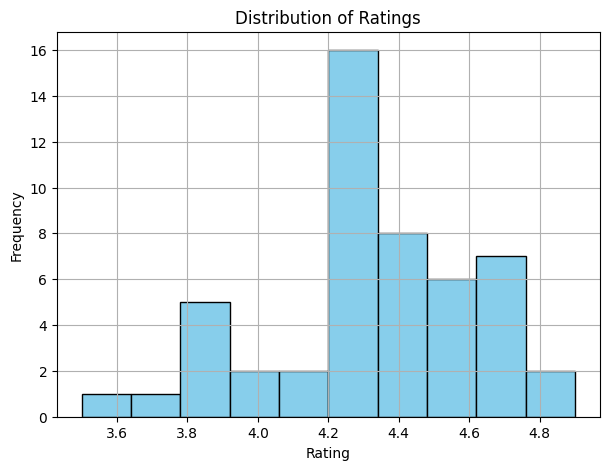

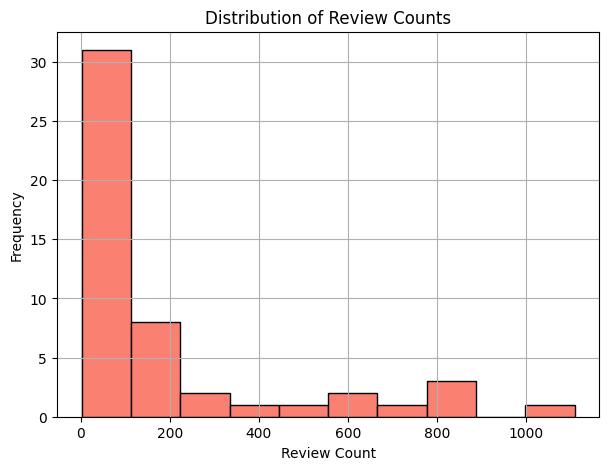

In [5]:
import matplotlib.pyplot as plt

# Histogram of the 'Rating' column
plt.figure(figsize=(7, 5))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of the 'Review Count' column
plt.figure(figsize=(7, 5))
plt.hist(df['Review Count'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

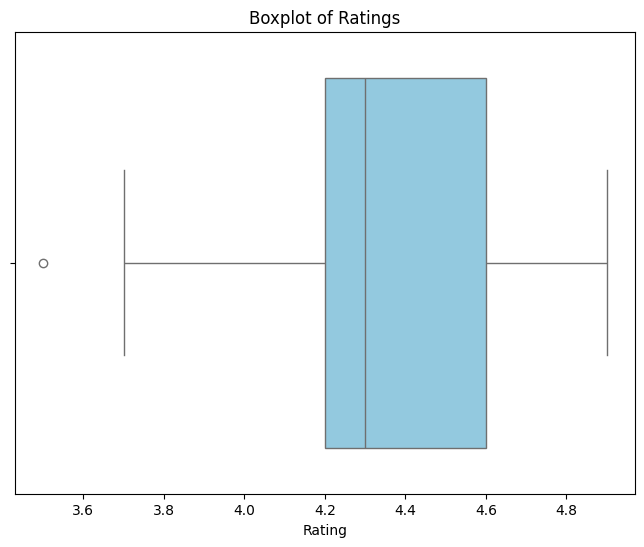

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'Rating' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=df, color='skyblue')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

In [7]:
# Remove missing values

df.dropna()

,Name,Rating,Review Count,Address
0,Dreamers Coffee House,4.6,77,"54W Henry St, New York, NY 10002"
1,Dawn’s ‘Til Dusk,4.3,28,"33 Main St, Brooklyn, NY 11201"
2,% Arabica,4.4,271,"20 Old Fulton St, Brooklyn, NY 11201"
3,Not As Bitter,4.3,15,"241 E 10th St, New York, NY 10003"
4,Creme,4.4,40,"27 1/2 Essex St, New York, NY 10002"
5,Coffee Project New York | East Village,4.7,785,"239 E 5th St, New York, NY 10003"
6,Sweet Moment,4.3,1110,"106 Mott St, New York, NY 10013"
7,The Little Sweet Cafe,4.3,208,"77B Hoyt St, Brooklyn, NY 11201"
8,Blue Stripes Cacao Shop,4.3,481,"28 East 13th St, New York, NY 10003"
9,Devocion,4.1,604,"69 Grand St, Brooklyn, NY 11249"


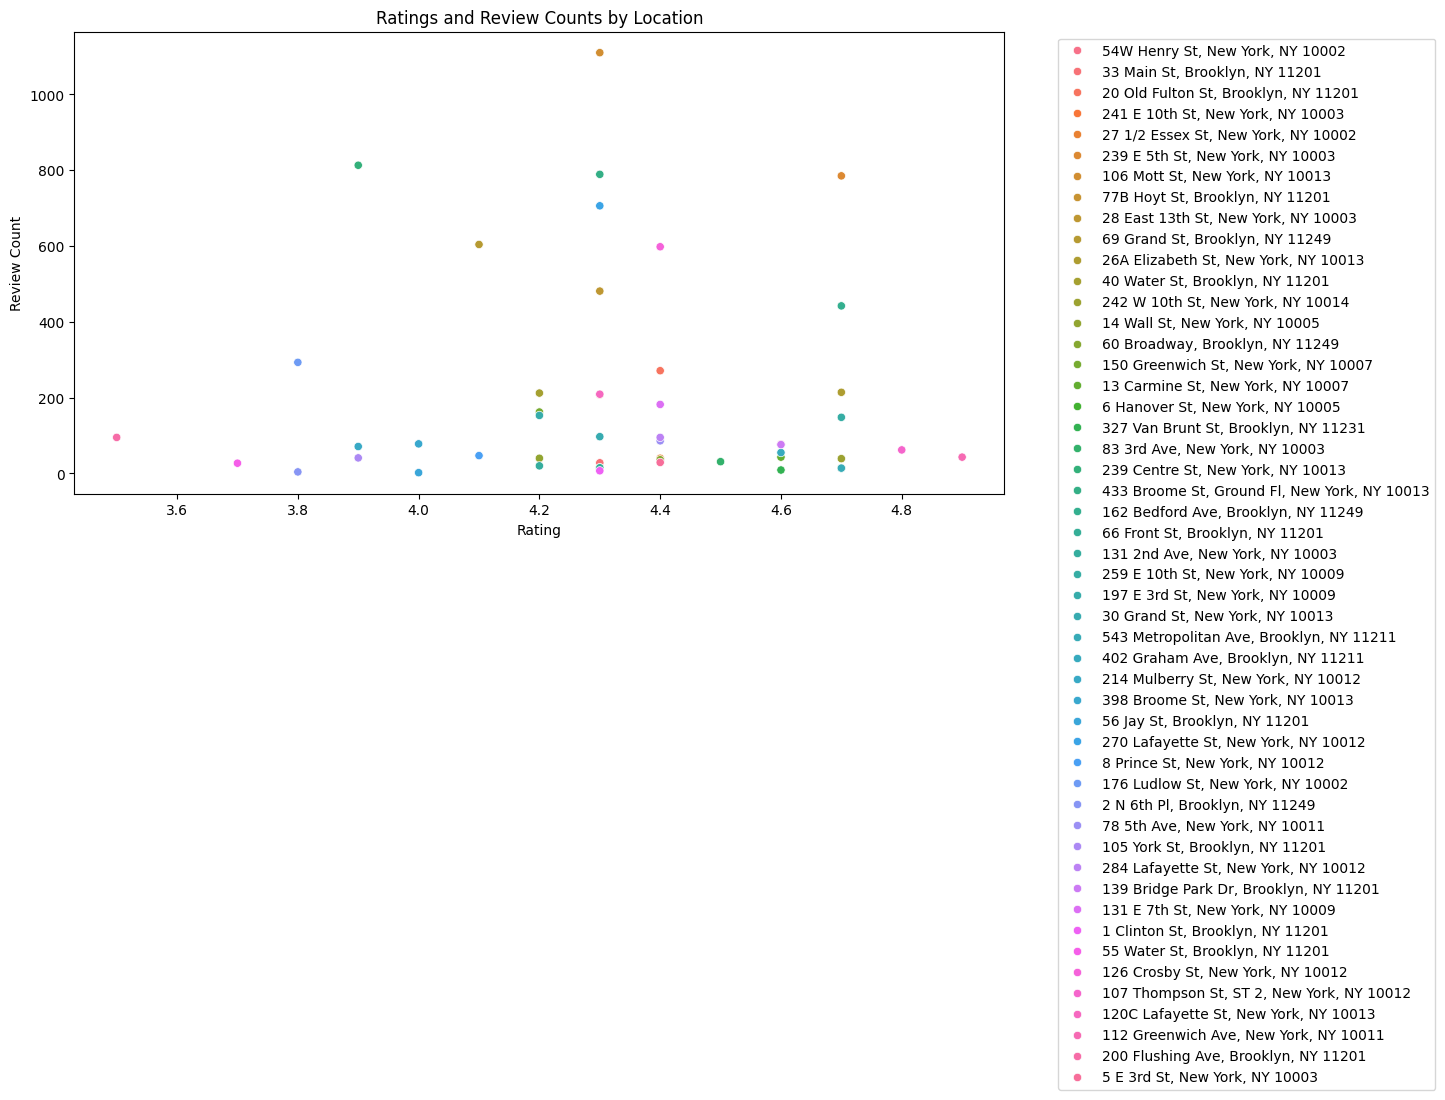

Top 10 Popular Coffee Shop Names:
Name
Brooklyn Roasting Company    3
% Arabica                    2
Kaigo Coffee Room            2
Dreamers Coffee House        1
Ludlow Coffee Supply         1
Book Club Bar                1
Now or Never Coffee          1
Land to Sea                  1
Café Leon Dore               1
The Lost Draft               1
Name: count, dtype: int64


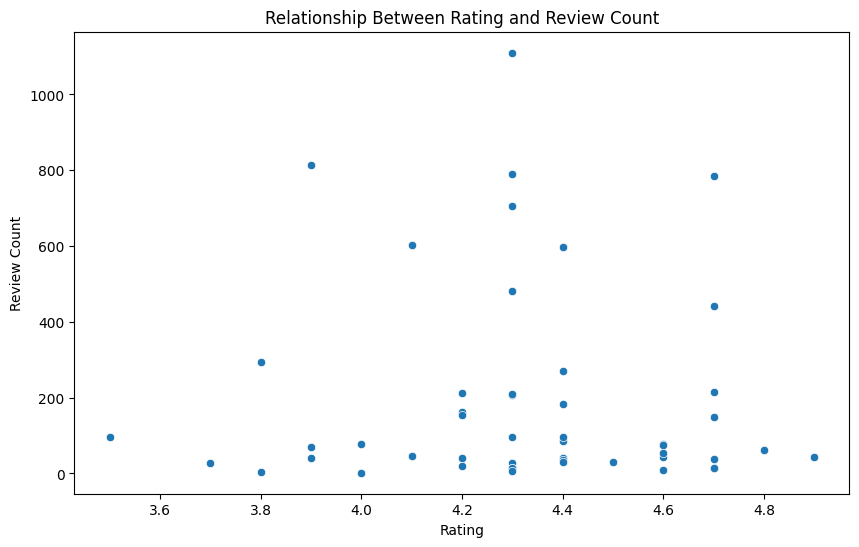

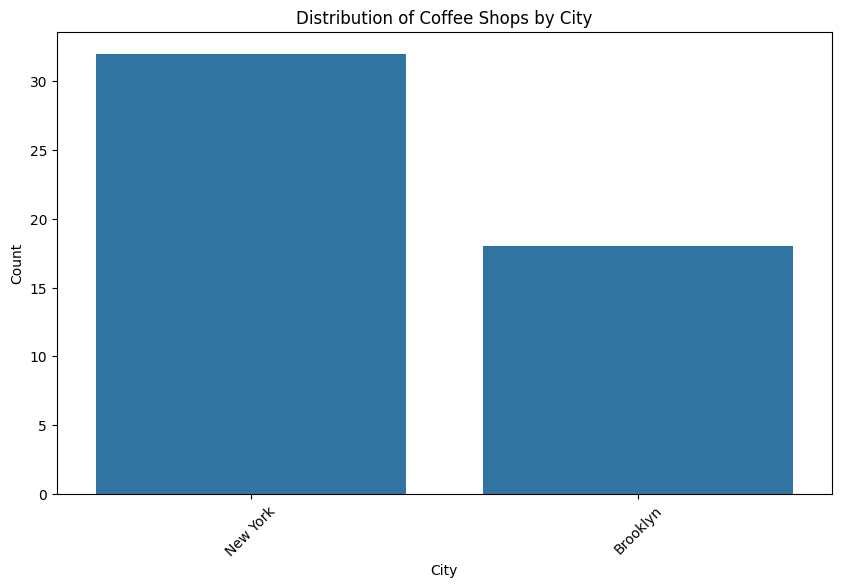

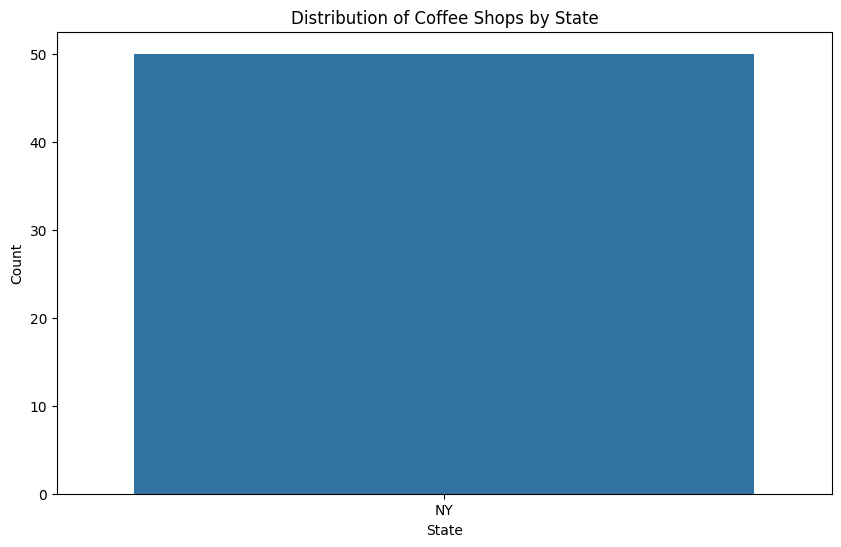

In [11]:
# Explore Ratings and Review Counts by Location
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rating', y='Review Count', hue='Address')
plt.title('Ratings and Review Counts by Location')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Identify Popular Coffee Shop Names
popular_names = df['Name'].value_counts().head(10)
print("Top 10 Popular Coffee Shop Names:")
print(popular_names)

# Analyze the Relationship Between Rating and Review Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Review Count')
plt.title('Relationship Between Rating and Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

# Explore Address Components
df['City'] = df['Address'].apply(lambda x: x.split(', ')[-2])
df['State'] = df['Address'].apply(lambda x: x.split(', ')[-1].split(' ')[0])
df['Postal Code'] = df['Address'].apply(lambda x: x.split(', ')[-1].split(' ')[-1])

# Analyze the distribution of cities
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City')
plt.title('Distribution of Coffee Shops by City')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

plt.show()

# Analyze the distribution of states
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State')
plt.title('Distribution of Coffee Shops by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [ ]:
#!pip install textblob

In [12]:
#Perform Text Mining and Sentiment Analysis

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Combine all reviews into one string
all_reviews = ' '.join(df['Name'])

# Tokenize words
tokens = word_tokenize(all_reviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Display the most common words
print("Most common words:")
print(word_freq.most_common(10))

Most common words:
[('Coffee', 17), ('House', 4), ('Cafe', 4), ('Brooklyn', 3), ('Roasting', 3), ('Company', 3), ('%', 2), ('Arabica', 2), ('New', 2), ('York', 2)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#!pip install wordcloud

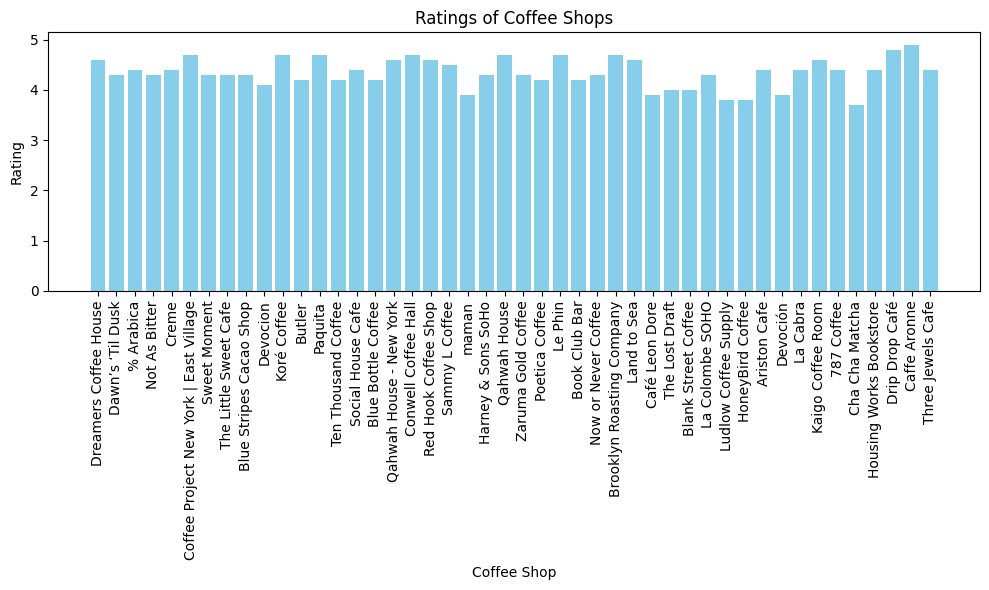

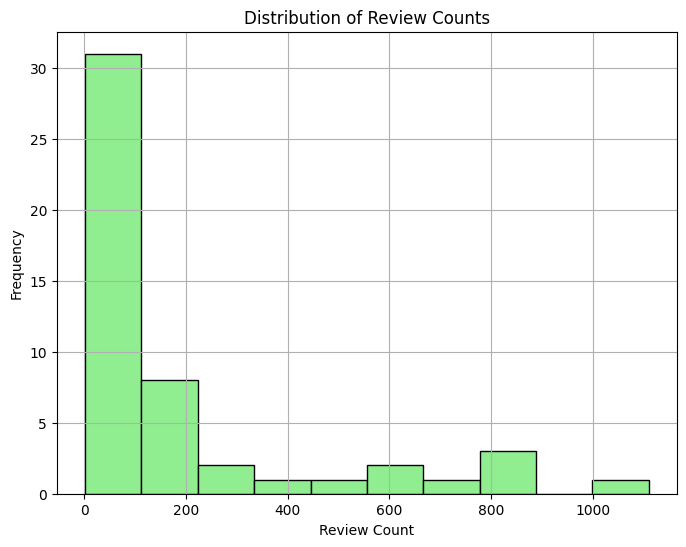

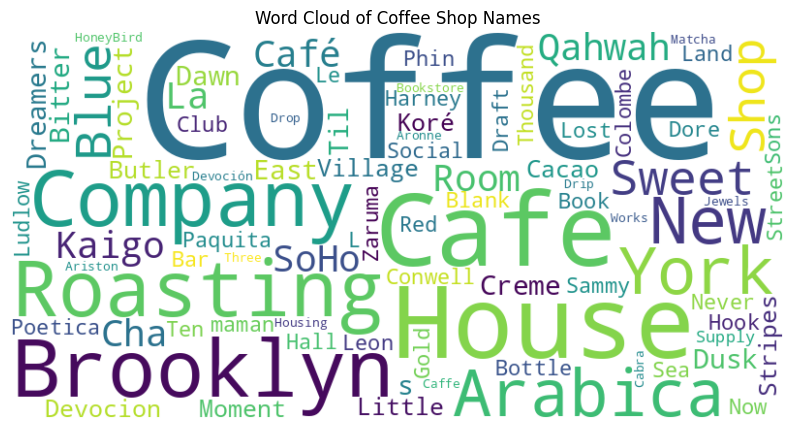

In [13]:
from wordcloud import WordCloud

# Bar plot of Ratings
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Rating'], color='skyblue')
plt.xlabel('Coffee Shop')
plt.ylabel('Rating')
plt.title('Ratings of Coffee Shops')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histogram of Review Counts
plt.figure(figsize=(8, 6))
plt.hist(df['Review Count'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Counts')
plt.grid(True)
plt.show()

# Word Cloud of Coffee Shop Names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Name']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Coffee Shop Names')
plt.axis('off')
plt.show()

In [14]:
# Competitor Analysis

import numpy as np

# Calculate combined score
df['Combined Score'] = df['Rating'] * np.log(df['Review Count'])

# Find coffee shop with the highest combined score
best_coffee_shop = df.loc[df['Combined Score'].idxmax()]

print("Best Coffee Shop:")
print(best_coffee_shop[['Name', 'Rating', 'Review Count']])

Best Coffee Shop:
Name            Coffee Project New York | East Village
Rating                                             4.7
Review Count                                       785
Name: 5, dtype: object


In [20]:
# Filter out the Coffee Project New York | East Village
coffee_project = df[df['Name'] == 'Coffee Project New York | East Village']

# Get its rating and review count
coffee_project_rating = coffee_project['Rating'].iloc[0]
coffee_project_review_count = coffee_project['Review Count'].iloc[0]

# Calculate average rating and review count of other competitors
avg_rating = df[df['Name'] != 'Coffee Project New York | East Village']['Rating'].mean()
avg_review_count = df[df['Name'] != 'Coffee Project New York | East Village']['Review Count'].mean()

print("Coffee Project New York | East Village:")
print("Rating:", coffee_project_rating)
print("Review Count:", coffee_project_review_count)
print("\nCompetitor Analysis:")
print("Average Rating of Competitors:", avg_rating)
print("Average Review Count of Competitors:", avg_review_count)

Coffee Project New York | East Village:
Rating: 4.7
Review Count: 785

Competitor Analysis:
Average Rating of Competitors: 4.318367346938776
Average Review Count of Competitors: 182.26530612244898


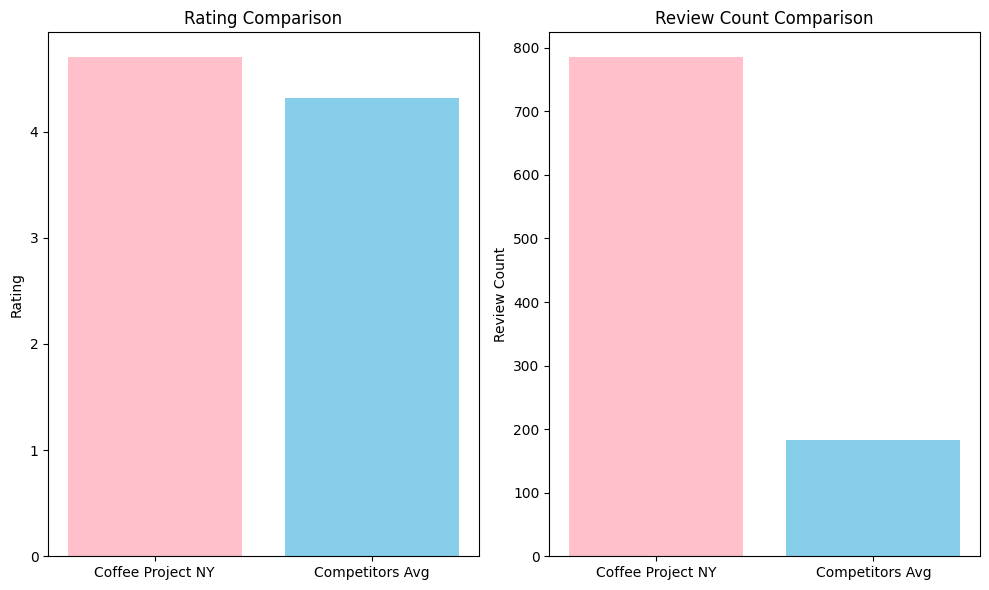

In [21]:
# Define data
labels = ['Coffee Project NY', 'Competitors Avg']
rating_data = [coffee_project_rating, avg_rating]
review_count_data = [coffee_project_review_count, avg_review_count]

# Plotting
plt.figure(figsize=(10, 6))

# Rating comparison
plt.subplot(1, 2, 1)
plt.bar(labels, rating_data, color=['pink', 'skyblue'])
plt.title('Rating Comparison')
plt.ylabel('Rating')

# Review count comparison
plt.subplot(1, 2, 2)
plt.bar(labels, review_count_data, color=['pink', 'skyblue'])
plt.title('Review Count Comparison')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()

In [32]:
import requests

# Define your Yelp API key
API_KEY = 'Mguw9Zi69xOkEzhD-wdZzfsk5wp0H8fbdDjcoNPE7_lNu8tG27HHpTuXDpRBcg996vH2K5olbx1ljKPCJ-sHqMpG0etkwqwa_Vm1pKI1aufVNOUaPsrRW33VpNbnZXYx'

# Define the search parameters for coffee shops
locations = {
    'Coffee Project NY | East Village': 'New York, NY',
    'Caffe Aronne': 'New York, NY',
    'Koré Coffee': 'New York, NY',
    'Drip Drop Café': 'New York, NY'
}

# Yelp API endpoint for business search
url = 'https://api.yelp.com/v3/businesses/search'

# Define headers with API key
headers = {
    'Authorization': f'Bearer {API_KEY}',
}

# Number of reviews to fetch at a time
limit = 3

# Function to fetch reviews for a given coffee shop
def fetch_reviews(coffee_shop, location):
    # Make GET request to Yelp API for coffee shop
    response = requests.get(url, headers=headers, params={'location': location, 'term': coffee_shop})

    # Check if request was successful
    if response.status_code == 200:
        # Parse JSON response
        data = response.json()

        # Extract business ID
        business_id = data['businesses'][0]['id']

        # Yelp API endpoint for business reviews
        reviews_url = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'

        # Variable to track the total number of reviews fetched
        total_reviews_fetched = 0

        # Print coffee shop name
        print(f'Reviews for {coffee_shop}:')

        # Pagination loop
        while total_reviews_fetched < limit:
            # Make GET request to Yelp API for reviews
            reviews_response = requests.get(reviews_url, headers=headers, params={'limit': limit, 'offset': total_reviews_fetched})

            # Check if request was successful
            if reviews_response.status_code == 200:
                # Parse JSON response for reviews
                reviews_data = reviews_response.json()

                # Extract reviews from the response
                reviews = reviews_data['reviews']

                # Process the reviews
                for review in reviews:
                    user_name = review['user']['name']
                    rating = review['rating']
                    text = review['text']

                    # Print the review
                    print(f'User: {user_name}, Rating: {rating}, Review: {text}')

                # Update the total number of reviews fetched
                total_reviews_fetched += len(reviews)

                # If there are no more reviews to fetch, break the loop
                if len(reviews) < limit:
                    break

            else:
                print('Error occurred while fetching reviews from Yelp API')
                break

    else:
        print(f'Error occurred while fetching data for {coffee_shop} from Yelp API')

# Fetch reviews for each coffee shop
for coffee_shop, location in locations.items():
    fetch_reviews(coffee_shop, location)

Reviews for Coffee Project NY | East Village:
User: Jenny N., Rating: 4, Review: I thought it was good coffee overall but the price is definitely up there. It's a modern place & I think they roast their beans in house. Everyone's nice...
User: Ryan F., Rating: 5, Review: Had a coffee at Academy At Coffee Project NY on Wednesday morning. Fantastic quality and a very unique setting, worth a stop if near this isolated...
User: Justine D., Rating: 5, Review: I'm super glad that I had the opportunity to come to this location of Coffee Project NY (as opposed to go to their more popular locations in Manhattan)....
Reviews for Caffe Aronne:
User: Jessica S., Rating: 5, Review: Standing for Israel, I stand with you!  Best coffee and service all around!  Glad you got rid of the rifraf employees who don't respect you. 
Almond...
User: Samantha D., Rating: 4, Review: Oat honey latte was just what I needed to warm me up on a cold day and wake me up in time for work. The coffee was smooth, and the h

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words for Coffee Project NY: [('coffee', 4), ('.', 3), ('...', 3), ("'s", 2), ('project', 2), ('ny', 2), ('thought', 1), ('good', 1), ('overall', 1), ('price', 1)]


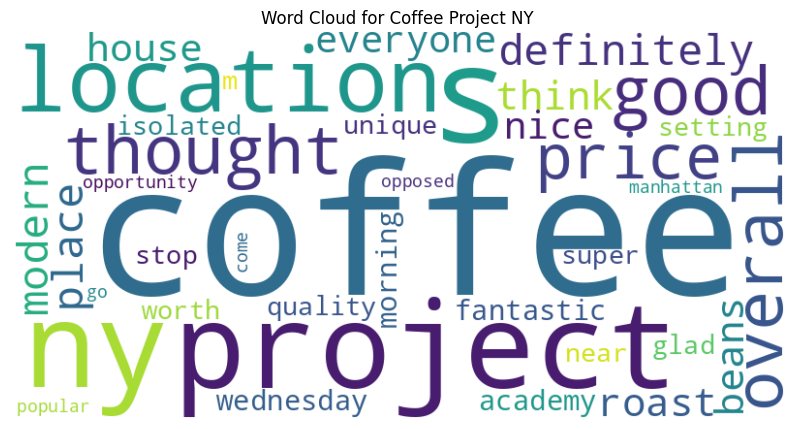

Top 10 words for Caffe Aronne: [(',', 3), ('.', 3), ('...', 3), ('!', 2), ('coffee', 2), ('honey', 2), ('standing', 1), ('israel', 1), ('stand', 1), ('best', 1)]


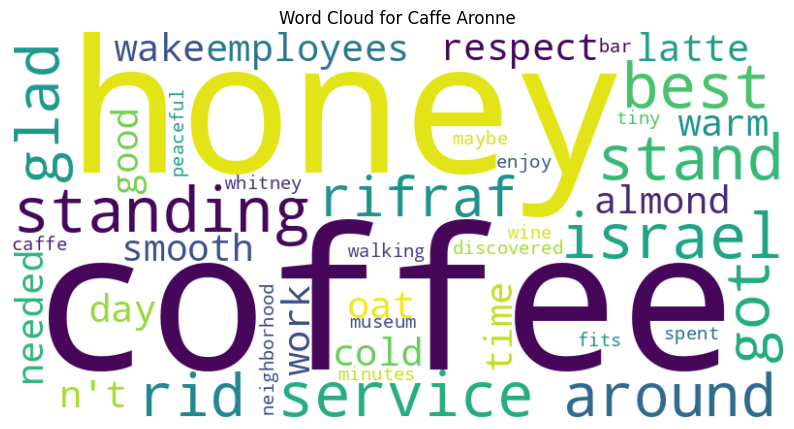

Top 10 words for Koré Coffee: [('.', 4), ('!', 4), ('tiramisu', 3), ('latte', 3), ('coffee', 3), ('croffle', 2), ('...', 2), ('place', 2), ('great', 2), ('got', 1)]


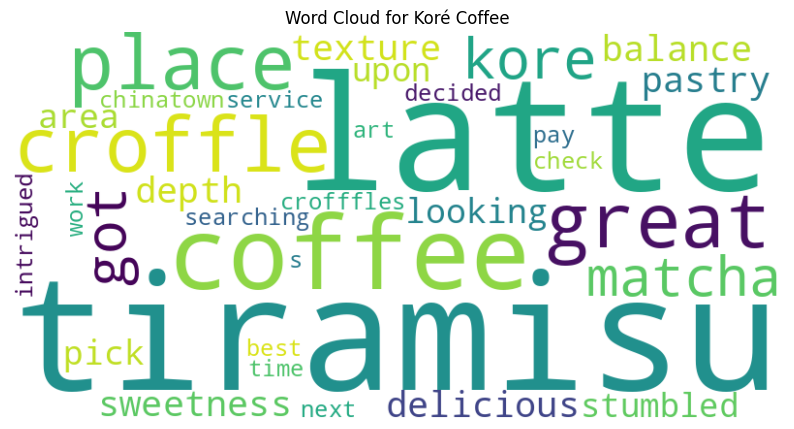

Top 10 words for Drip Drop Café: [('.', 4), ('cute', 3), ('!', 3), (',', 3), ('...', 3), ('coffee', 3), ('little', 2), ('shop', 2), ('cafe', 1), ('extremely', 1)]


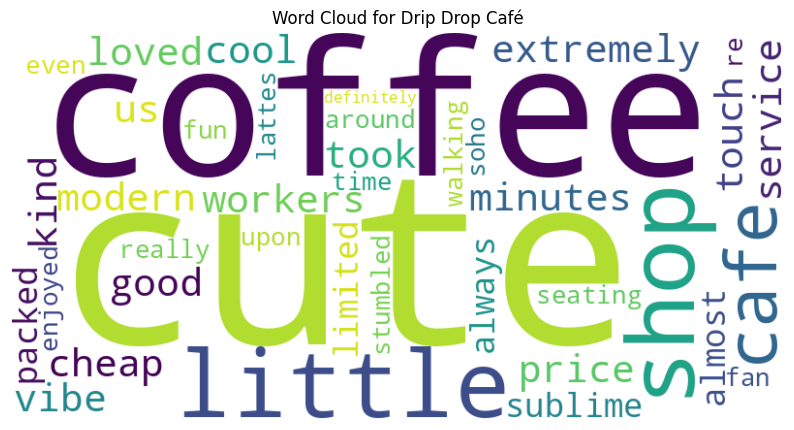

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define reviews for each coffee shop
reviews = {
    "Coffee Project NY": [
        "I thought it was good coffee overall but the price is definitely up there. It's a modern place & I think they roast their beans in house. Everyone's nice...",
        "Had a coffee at Academy At Coffee Project NY on Wednesday morning. Fantastic quality and a very unique setting, worth a stop if near this isolated...",
        "I'm super glad that I had the opportunity to come to this location of Coffee Project NY (as opposed to go to their more popular locations in Manhattan)..."
    ],
    "Caffe Aronne": [
        "Standing for Israel, I stand with you! Best coffee and service all around! Glad you got rid of the rifraf employees who don't respect you. Almond...",
        "Oat honey latte was just what I needed to warm me up on a cold day and wake me up in time for work. The coffee was smooth, and the honey was a good...",
        "Discovered this tiny caffe/wine bar (fits maybe 4-6) walking to The Whitney Museum. Spent a peaceful few minutes to enjoy where I am, the neighborhood is..."
    ],
    "Koré Coffee": [
        "I got a Kore Tiramisu Latte and a Matcha croffle and both were delicious. Tiramisu latte had balance of depth and sweetness. The Croffle pastry texture and...",
        "Was looking for a pick-me-up in the area and stumbled upon this place when searching for coffee. I was intrigued by the Tiramisu latte and decided to pay a...",
        "Great service! Great coffee! Best coffee place in Chinatown! Check out the crofffles next time. It's a work of art!"
    ],
    "Drip Drop Café": [
        "This cafe is so cute. Extremely cheap and good for the price!! loved it here. The workers were kind, and it only took about 2-4 minutes for us to get our...",
        "Cute little coffee shop with a cool vibe and a modern touch. Service is is sublime and its almost always packed with limited seating. Even so, their coffee...",
        "Stumbled upon this cute little coffee shop while walking around SoHo and really enjoyed my time here! If you're a fan of fun lattes, they definitely have..."
    ]
}

# Function to preprocess text
def preprocess_text(text):
    # Tokenize words
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return filtered_tokens

# Function to plot word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Analyze word frequency and generate word cloud for each coffee shop
for shop, reviews_list in reviews.items():
    # Preprocess reviews
    preprocessed_reviews = [preprocess_text(review) for review in reviews_list]

    # Flatten list of preprocessed reviews
    flattened_reviews = [word for sublist in preprocessed_reviews for word in sublist]

    # Count word frequencies
    word_freq = Counter(flattened_reviews)

    # Get top 10 most common words
    top_words = word_freq.most_common(10)

    # Print top words for each coffee shop
    print(f"Top 10 words for {shop}: {top_words}")

    # Convert top words to text for word cloud
    word_cloud_text = ' '.join(flattened_reviews)

    # Plot word cloud
    plot_word_cloud(word_cloud_text, f"Word Cloud for {shop}")
